# Biblioteci

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Descarcarea setului de date

In [19]:
data = pd.read_csv('/home/bciupitu/DataspellProjects/PCLP3/Proiect/titanic (1)/train.csv')

# Cerinta 1

In [31]:
nr_coloane = len(data.columns)
tip_date = data.dtypes
nr_valori_lipsa = data.isnull().sum()
nr_linii = len(data)
linii_duplicate = data.duplicated().sum()

print("Numarul de coloane: ", nr_coloane, "\n")
print("Tipul datelor: ", tip_date, "\n")
print("Numarul de valori lipsa pentru fiecare coloane: ", nr_valori_lipsa, "\n")
print("Numarul de linii: ", nr_linii, "\n")
if  linii_duplicate > 0:
    print("Exista linii dublicate")
else:
    print("Nu exista linii dublicate")

Numarul de coloane:  15 

Tipul datelor:  PassengerId             int64
Survived                int64
Pclass                  int64
Name                   object
Sex                    object
Age                   float64
SibSp                   int64
Parch                   int64
Ticket                 object
Fare                  float64
Cabin                  object
Embarked               object
AgeCategory          category
Title_of_nobility      object
Alone                    bool
dtype: object 

Numarul de valori lipsa pentru fiecare coloane:  PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
AgeCategory          177
Title_of_nobility      0
Alone                  0
dtype: int64 

Numarul de linii:  891 

Nu exista linii dublicate


# Cerinta 2

Numarul de persoane supravietuite:  342
Numarul de persoane decedate:  549
Numarul total de persoane:  891


Procentul de persoane supravietuite: 38.38383838383838%
Procentul de persoane decedate: 61.61616161616162%


Procentul de persoane din fiecare clasa:  Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


Procentul de barbati: 64.75869809203144%
Procentul de femei: 35.24130190796858%




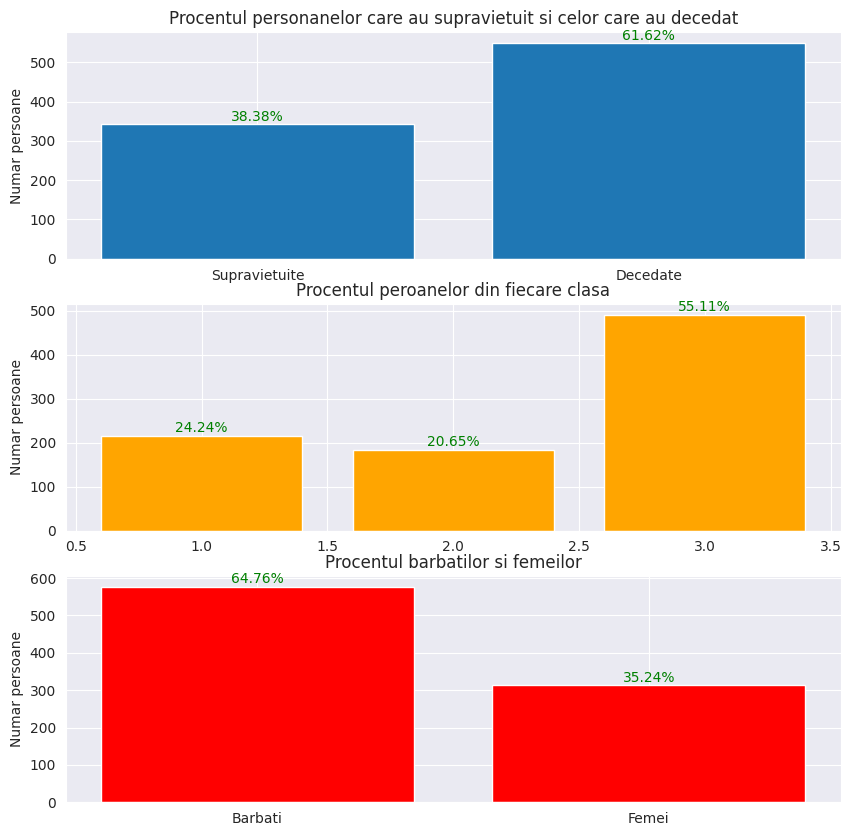

In [21]:
nr_persoane_supravietuite = data['Survived'].sum()
nr_persoane_decedate = nr_linii - nr_persoane_supravietuite
print("Numarul de persoane supravietuite: ", nr_persoane_supravietuite)
print("Numarul de persoane decedate: ", nr_persoane_decedate)
print("Numarul total de persoane: ", nr_linii)
print("\n")

procent_persoane_supravietuite = data['Survived'].mean() * 100
procent_persoane_decedate = 100 - procent_persoane_supravietuite
print(f'Procentul de persoane supravietuite: {procent_persoane_supravietuite}%')
print(f'Procentul de persoane decedate: {procent_persoane_decedate}%')
print("\n")

nr_persoane_pe_fiecare_clasa = data['Pclass'].value_counts()
procent_pclass = (nr_persoane_pe_fiecare_clasa / nr_linii) * 100
print("Procentul de persoane din fiecare clasa: ", procent_pclass)
print("\n")
# Am PUS PE nr_linii, PENTRU CA STIU CA NU EXISTA LINII DUPLICATE

nr_barbati = data['Sex'].value_counts()['male']
nr_femei = data['Sex'].value_counts()['female']
procentaj_barbati = (nr_barbati / nr_linii) * 100
procentaj_femei = (nr_femei / nr_linii) * 100

print(f'Procentul de barbati: {procentaj_barbati}%')
print(f'Procentul de femei: {procentaj_femei}%')
print("\n")

# Graficul
fig, ax = plt.subplots(3, 1, figsize=(10, 10)) # 3 grafice pe verticala

# Graficul 1
bars = ax[0].bar(['Supravietuite', 'Decedate'], [nr_persoane_supravietuite, nr_persoane_decedate])
ax[0].set_title('Procentul personanelor care au supravietuit si celor care au decedat')
ax[0].set_ylabel('Numar persoane')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, height + 1, f'{round(height / nr_linii * 100, 2)}%', ha='center', va='bottom', color='green')

# Graficul 2
bars = ax[1].bar(nr_persoane_pe_fiecare_clasa.index, nr_persoane_pe_fiecare_clasa.values, color='orange')
ax[1].set_title('Procentul peroanelor din fiecare clasa')
ax[1].set_ylabel('Numar persoane')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax[1].text(bar.get_x() + bar.get_width() / 2, height + 1, f'{round(height / nr_linii * 100, 2)}%', ha='center', va='bottom', color='green')

# Graficul 3
bars = ax[2].bar(['Barbati', 'Femei'], [nr_barbati, nr_femei], color='red')
ax[2].set_title('Procentul barbatilor si femeilor')
ax[2].set_ylabel('Numar persoane')
for i, bar in enumerate(bars):
    height = bar.get_height()
    # Adaugam textul cu procentul de persoane cu 2 zecimale
    ax[2].text(bar.get_x() + bar.get_width() / 2, height + 1, f'{round(height / nr_linii * 100, 2)}%', ha='center', va='bottom', color='green')
    
plt.show()

# Cerinta 3

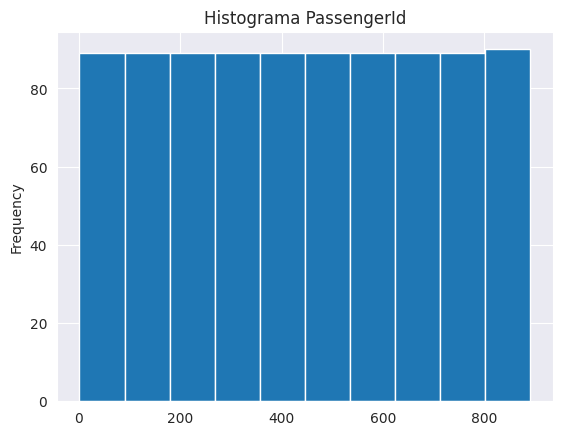

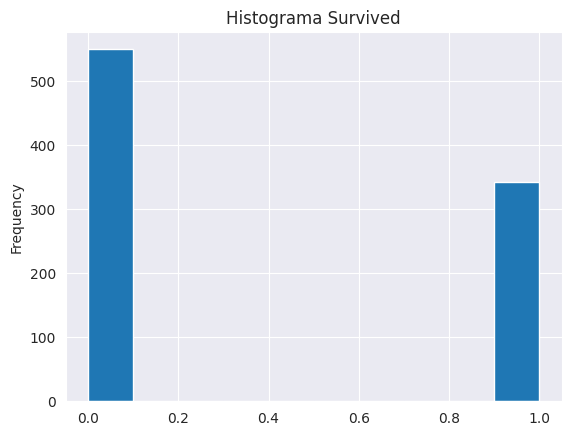

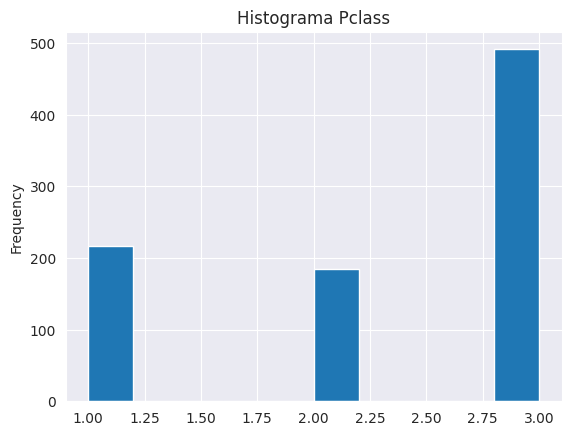

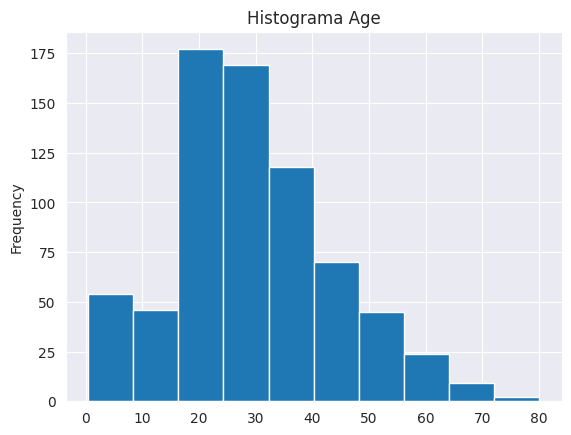

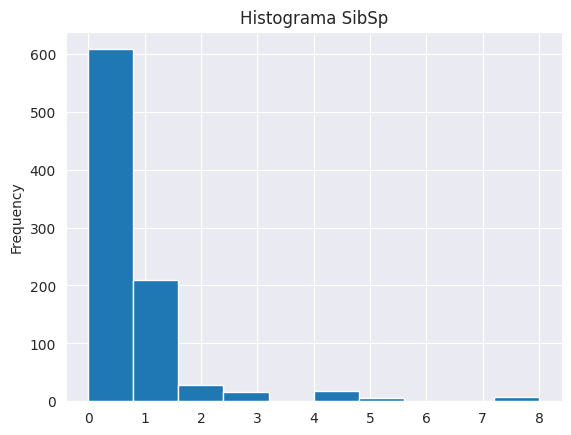

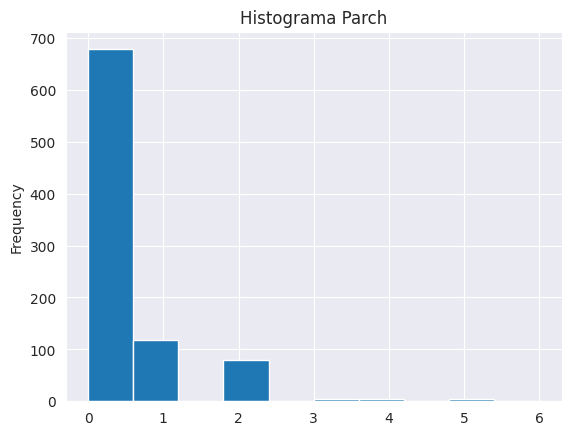

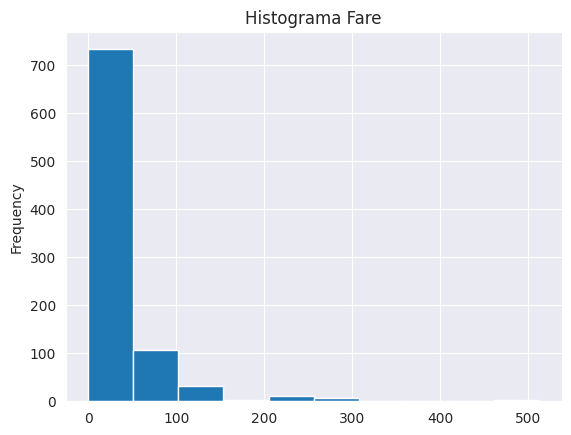

In [22]:
coloane_numerice = data.select_dtypes(include=[np.number]).columns

for coloana in coloane_numerice:
    data[coloana].plot(kind='hist', title=coloana)
    plt.title(f'Histograma {coloana}')    
    plt.show()

# Cerinta 4

In [23]:
coloane_cu_valori_lipsa = data.columns[data.isnull().any()]

# Numarul si proportia de valori lipsa pentru fiecare coloana 
for coloana in coloane_cu_valori_lipsa:
    nr_valori_lipsa = data[coloana].isnull().sum()
    procent_valori_lipsa = (nr_valori_lipsa / nr_linii) * 100
    if nr_valori_lipsa > 0:
        print(f'Coloana {coloana} are {nr_valori_lipsa} valori lipsa si procentul de {procent_valori_lipsa}%')
    
print("\n")
# Procenul valorilor lipsa pentru fiecare dintre cele doua clase(coloana Survived)
for clasa in data['Survived'].unique():
    data_clasa = data[data['Survived'] == clasa]
    nr_linii_clasa = len(data_clasa)
    print(f'\nClasa {clasa}:')
    for coloana in coloane_cu_valori_lipsa:
        nr_valori_lipsa = data_clasa[coloana].isnull().sum()
        procent_valori_lipsa = (nr_valori_lipsa / nr_linii_clasa) * 100
        if nr_valori_lipsa > 0:
            print(f'Coloana {coloana} are {nr_valori_lipsa} valori lipsa si procentul de {procent_valori_lipsa}%')

Coloana Age are 177 valori lipsa si procentul de 19.865319865319865%
Coloana Cabin are 687 valori lipsa si procentul de 77.10437710437711%
Coloana Embarked are 2 valori lipsa si procentul de 0.22446689113355783%



Clasa 0:
Coloana Age are 125 valori lipsa si procentul de 22.768670309653917%
Coloana Cabin are 481 valori lipsa si procentul de 87.61384335154827%

Clasa 1:
Coloana Age are 52 valori lipsa si procentul de 15.204678362573098%
Coloana Cabin are 206 valori lipsa si procentul de 60.23391812865497%
Coloana Embarked are 2 valori lipsa si procentul de 0.5847953216374269%


# Cerinta 5

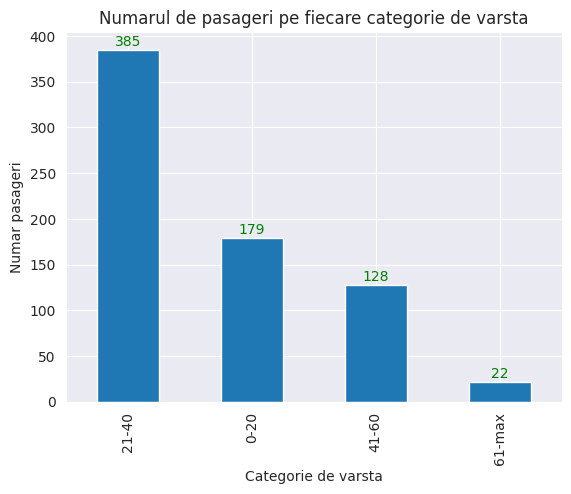

In [24]:
data['AgeCategory'] = pd.cut(data["Age"], bins=[0, 20, 40, 60, data['Age'].max()], labels=['0-20', '21-40', '41-60', '61-max'])
nr_pasageri_pe_categorie = data['AgeCategory'].value_counts()

nr_pasageri_pe_categorie.plot(kind='bar')
plt.title('Numarul de pasageri pe fiecare categorie de varsta')
plt.xlabel('Categorie de varsta')
plt.ylabel('Numar pasageri')
for i, bar in enumerate(nr_pasageri_pe_categorie):
    plt.text(i, bar + 1, f'{bar}', ha='center', va='bottom', color='green')
plt.show()

# Cerinta 6

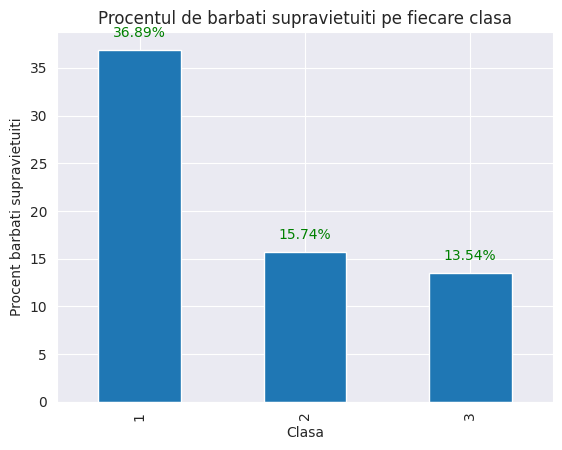

In [25]:
nr_barbati_supravietuiti_pe_clasa = data[data['Sex'] == 'male'].groupby('Pclass')['Survived'].mean() * 100

nr_barbati_supravietuiti_pe_clasa.plot(kind='bar')
plt.title('Procentul de barbati supravietuiti pe fiecare clasa')
plt.xlabel('Clasa')
plt.ylabel('Procent barbati supravietuiti')
for i, bar in enumerate(nr_barbati_supravietuiti_pe_clasa):
    plt.text(i, bar + 1, f'{round(bar, 2)}%', ha='center', va='bottom', color='green')
plt.show()

# Cerinta 7

Procentul de copii aflati la bord: 12.682379349046016%


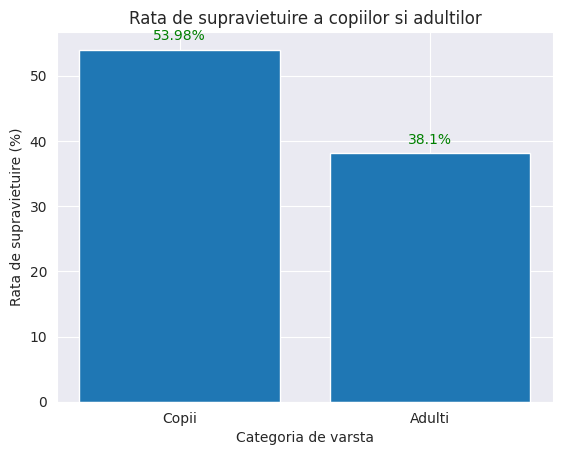

In [26]:
copii = data[data['Age'] < 18]
adulti = data[data['Age'] >= 18]

procent_copii = (len(copii) / nr_linii) * 100
print(f'Procentul de copii aflati la bord: {procent_copii}%')

copii_rata_supravietuire = copii['Survived'].mean() * 100
adulti_rata_supravietuire = adulti['Survived'].mean() * 100

plt.bar(['Copii', 'Adulti'], [copii_rata_supravietuire, adulti_rata_supravietuire])
plt.title('Rata de supravietuire a copiilor si adultilor')
plt.xlabel('Categoria de varsta')
plt.ylabel('Rata de supravietuire (%)')
for i, bar in enumerate([copii_rata_supravietuire, adulti_rata_supravietuire]):
    plt.text(i, bar + 1, f'{round(bar, 2)}%', ha='center', va='bottom', color='green')
plt.show()

# Cerinta 8

In [27]:
for coloana in coloane_cu_valori_lipsa:
    if data[coloana].dtype in ['int64', 'float64']:
        for clasa in data['Survived'].unique():
            valoare_de_inlocuit = data[data['Survived'] == clasa][coloana].mean()
            data.loc[(data['Survived'] == clasa) & (data[coloana].isnull()), coloana] = valoare_de_inlocuit
    else:
        for clasa in data['Survived'].unique():
            valoare_de_inlocuit = data[data['Survived'] == clasa][coloana].mode()[0]
            data.loc[(data['Survived'] == clasa) & (data[coloana].isnull()), coloana] = valoare_de_inlocuit

# Cerinta 9

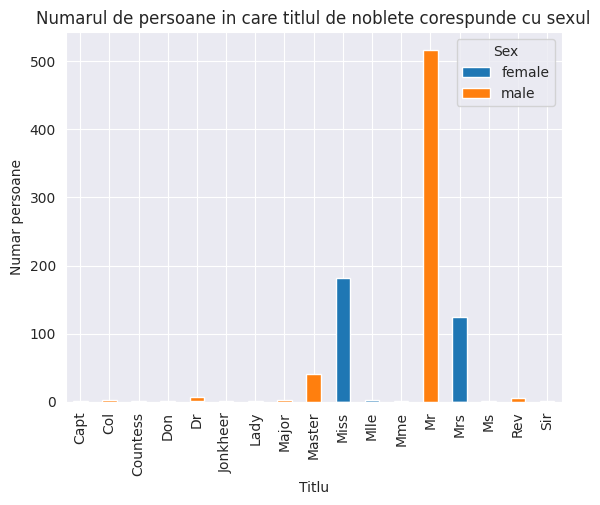

In [28]:
data['Title_of_nobility'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

title_sex_match = data.groupby(['Title_of_nobility', 'Sex']).size().unstack()

title_sex_match.plot(kind='bar', stacked=True)
plt.xlabel('Titlu')
plt.ylabel('Numar persoane')
plt.title('Numarul de persoane in care titlul de noblete corespunde cu sexul')
plt.show()

# Cerinta 10

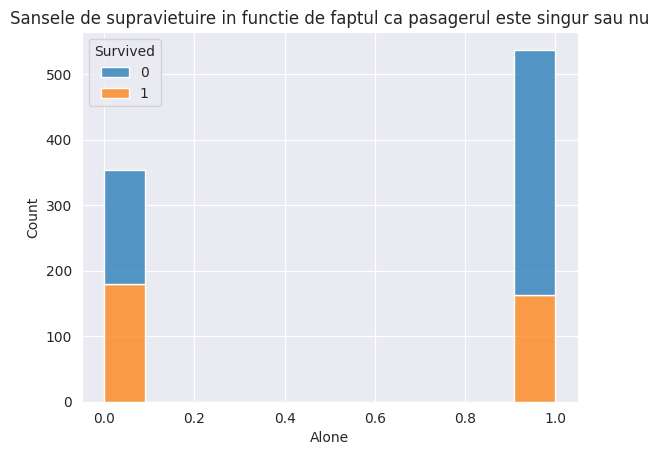

/home/bciupitu/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bciupitu/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 37.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bciupitu/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 34.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


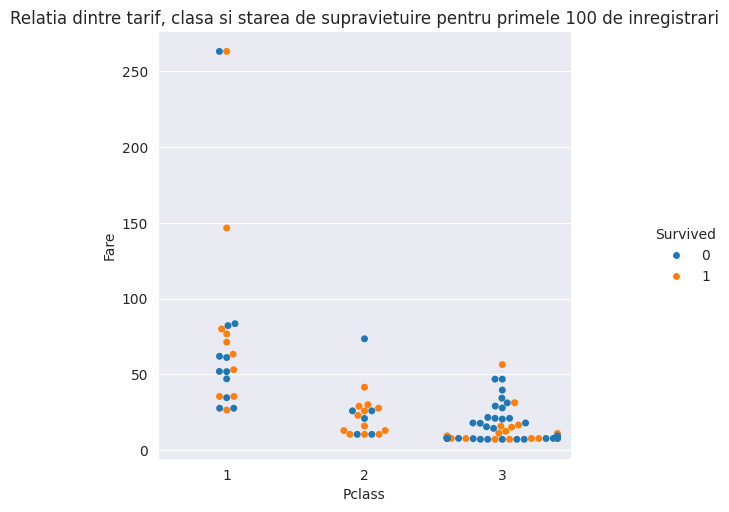

In [29]:
data['Alone'] = (data['SibSp'] == 0) & (data['Parch'] == 0)
    
sns.histplot(data = data, x = 'Alone', hue = 'Survived', multiple = 'stack')
plt.title("Sansele de supravietuire in functie de faptul ca pasagerul este singur sau nu")
plt.show()

sns.catplot(data.head(100), x = 'Pclass', y = 'Fare', hue = 'Survived', kind = 'swarm')
plt.title("Relatia dintre tarif, clasa si starea de supravietuire pentru primele 100 de inregistrari")
plt.show()

# Salvez dataframe-ul modificat intr-un fisier CSV

In [30]:
data.to_csv('/home/bciupitu/DataspellProjects/PCLP3/Proiect/titanic (1)/train_modified.csv', index=False)